In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('test.csv')
df

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,MIN_ONSET_LOG,MIN_ONSET_SQRT,MAX_ONSET_LOG,MAX_ONSET_SQRT,STD_ONSET_YEO_JON,MEAN_ONSET_LOG,MEAN_ONSET_SQRT,NasaTLX,subject_id,condition
0,0.000735,0.001764,0.000177,0.001587,0.543036,0.965257,1.850634e-05,0.000306,0.000023,0.000262,...,0.721074,1.027930,3.154608,4.737494,1.456944,1.625915,2.020660,27.6,2.0,2
1,0.000691,0.001764,0.000198,0.001566,0.950346,1.039783,-5.712810e-07,0.000275,0.000003,0.000242,...,0.721074,1.027930,3.084339,4.566512,1.381432,1.583538,1.967781,60.7,1.0,1
2,0.003698,0.010928,0.001505,0.009423,4.888562,2.204727,9.236140e-04,0.004557,-0.002940,0.004265,...,2.529238,3.397638,4.231222,8.234153,2.852115,3.740398,6.412078,62.6,5.0,2
3,0.003681,0.010928,0.001689,0.009239,6.399756,2.479169,-1.615331e-03,0.003109,0.001296,0.002037,...,2.529238,3.397638,4.203095,8.117454,2.521958,3.471639,5.584752,62.6,5.0,2
4,0.002909,0.007620,0.000802,0.006818,0.117454,1.000727,2.749421e-04,0.001386,0.000273,0.001333,...,1.188968,1.511189,3.259410,5.003417,2.003418,2.540301,3.418112,73.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,0.000903,0.002129,0.000315,0.001814,-0.964432,0.844293,-3.767347e-05,0.000501,0.000019,0.000423,...,0.895370,1.203429,4.859687,11.312996,3.017512,2.801558,3.933229,62.6,5.0,2
4768,0.001014,0.003172,0.000363,0.002809,2.494990,1.465298,7.721923e-06,0.000421,0.000031,0.000346,...,1.088141,1.403122,3.187994,4.820762,1.716898,2.173495,2.790869,39.4,2.0,0
4769,0.001951,0.004811,0.000516,0.004296,-0.814052,0.890061,-4.629442e-05,0.001295,0.000412,0.000832,...,2.070490,2.632244,3.810442,6.646082,2.326098,3.029593,4.437208,73.0,5.0,0
4770,0.001034,0.002279,0.000307,0.001972,-0.969131,0.436663,-3.081915e-05,0.000456,0.000011,0.000399,...,0.885751,1.193652,4.262102,8.364149,2.473801,2.583956,3.499922,26.1,2.0,1


<AxesSubplot:xlabel='condition', ylabel='count'>

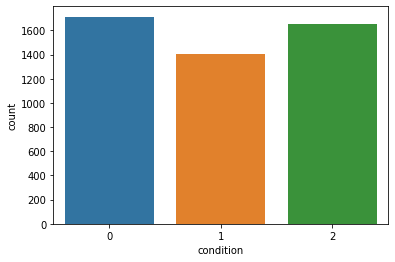

In [4]:
import seaborn as sns
sns.countplot(x='condition', data=df)

In [5]:
df['condition'].unique()

array([2, 1, 0], dtype=int64)

In [6]:
x=df.drop(["condition"]  ,axis=1)
x=x.drop(["subject_id"]  ,axis=1)
x.shape

(4772, 59)

In [8]:
y = df.loc[:,'condition'].values
y.shape

(4772,)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)

In [10]:
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [13]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

In [14]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
tf_op_layer_ExpandDims (Tens [(None, 1, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 1, 256)            198912    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 199,683
Trainable params: 199,683
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)


Epoch 1/50


ValueError: in user code:

    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:663 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\Revanna\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer gru is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 1, 1, 59]
